In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import nibabel as nb
import SUITPy as suit
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.atlas_map as am
from Functional_Fusion.dataset import *
import Functional_Fusion.matrix as matrix
import generativeMRF.evaluation as ev
from ProbabilisticParcellation.util import *
import pickle
import sys
sys.path.append("..")

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

This notebook looks at the effect of using different emissions models for different sessions and different kappas for different parcels 

## Asym K=10 parcellation on IBC only
First row is session joint - Second row sessions seperately 
First Column is uniform Kappa - Second column in seperate kappa 

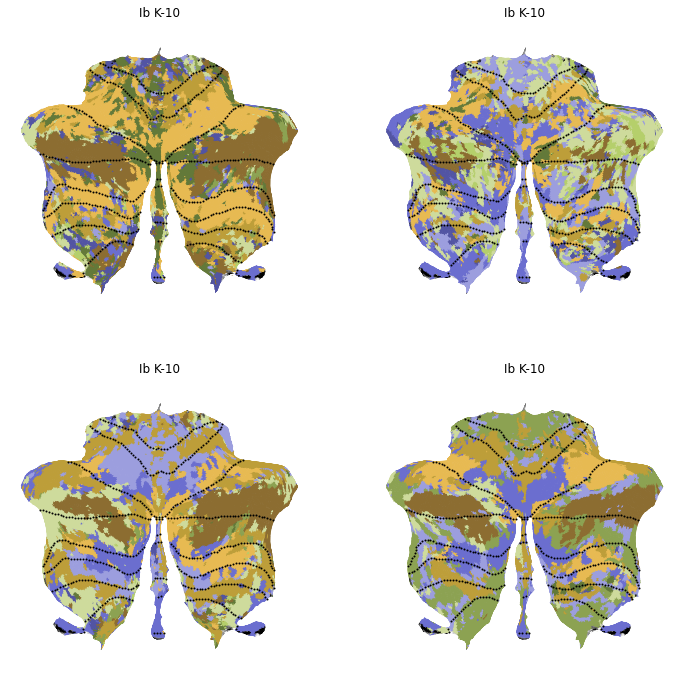

In [6]:
model_name = ['Models_01/asym_Ib_space-MNISymC3_K-10',
                  'Models_02/asym_Ib_space-MNISymC3_K-10',
                  'Models_03/asym_Ib_space-MNISymC3_K-10',
                  'Models_04/asym_Ib_space-MNISymC3_K-10']
fig = plt.figure(figsize=(12,15))
plot_model_parcel(model_name,[2,2],align=True)

## Symmetric K=20

###

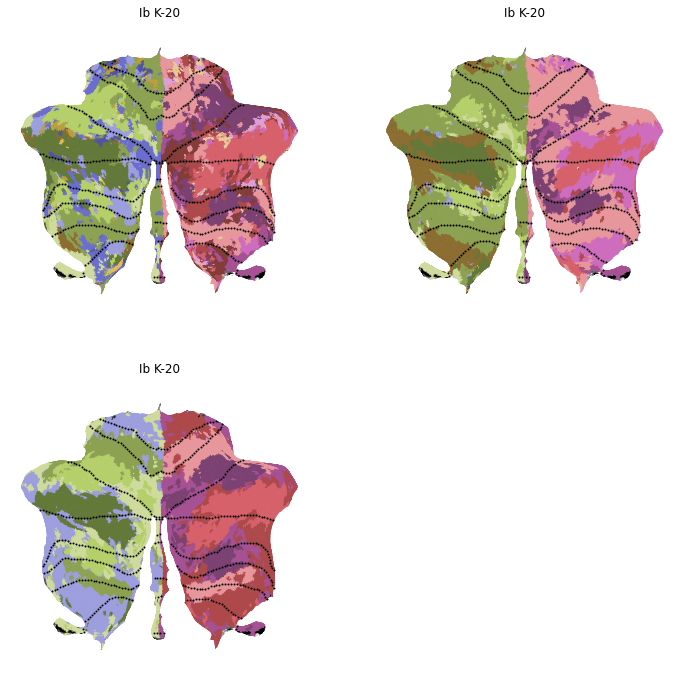

In [4]:
model_name = ['Models_01/sym_Ib_space-MNISymC3_K-20',
                  'Models_03/sym_Ib_space-MNISymC3_K-20',
                  'Models_04/sym_Ib_space-MNISymC3_K-20']
fig = plt.figure(figsize=(12,12))
plot_model_parcel(model_name,[2,2],align=True)

### Plot the Kappas for different sessions

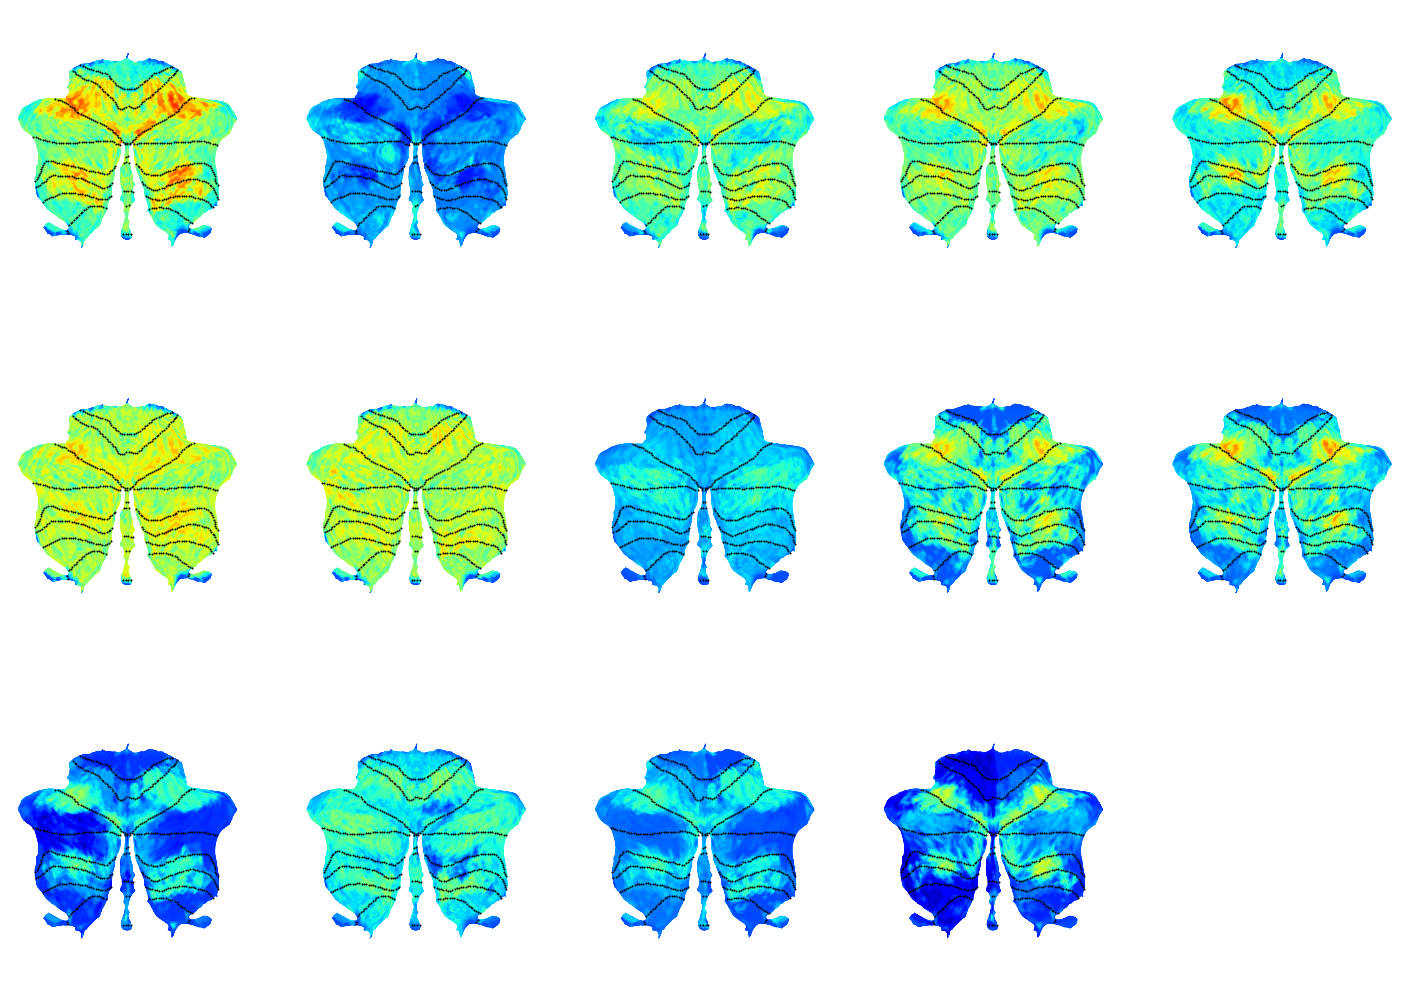

In [11]:
model_name = 'Models_04/sym_Ib_space-MNISymC3_K-34'
info,model = load_batch_best(model_name)
Prob = model.marginal_prob()
parcel = pt.argmax(Prob,dim=0)
kappa = ev.extract_kappa(model)
n_emissions = len(model.emissions)
kappa_maps = pt.zeros((n_emissions,Prob.shape[1]))
for i in range(n_emissions):
    kappa_maps[i,:]=pt.log(kappa[i,parcel])
plt.figure(figsize=(25,18))
plot_multi_flat(kappa_maps,'MNISymC3',grid=(3,5),
                    dtype = 'func',
                    cscale = [-1,4],
                    colorbar = False)

/Users/jdiedrichsen/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


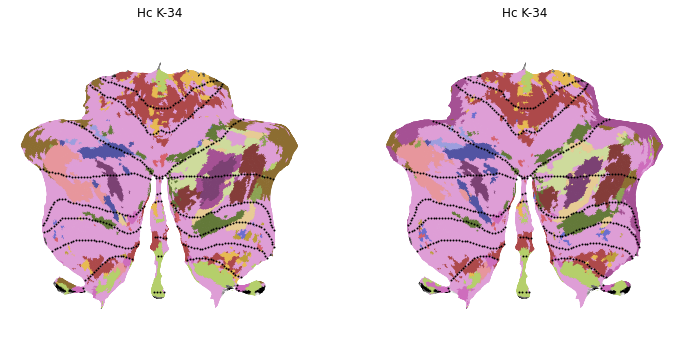

In [2]:
model_name = ['Models_04/sym_Hc_space-MNISymC3_K-34',
                  'Models_04/asym_Hc_space-MNISymC3_K-34']
fig = plt.figure(figsize=(12,6))
plot_model_parcel(model_name,[1,2],align=True)

In [9]:
info,model = load_batch_best('Models_04/sym_Ni_space-MNISymC3_K-34')
model